<a href="https://colab.research.google.com/github/twelvesense/first-repository/blob/master/ExplNode09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **프로젝트: 네이버 영화리뷰 감성분석 도전하기**

# 1 사전 준비

## 1-1. mecab 설치

In [3]:
# install konlpy, jdk, JPype
import os
!pip install konlpy
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!pip3 install JPype1-py3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# install mecab-ko
os.chdir('/tmp/')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
!tar zxfv mecab-0.996-ko-0.9.2.tar.gz
os.chdir('/tmp/mecab-0.996-ko-0.9.2')
!./configure
!make
!make check
!make install

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  2276k      0 --:--:-- --:--:-- --:--:-- 2276k
mecab-0.996-ko-0.9.2/
mecab-0.996-ko-0.9.2/example/
mecab-0.996-ko-0.9.2/example/example.cpp
mecab-0.996-ko-0.9.2/example/example_lattice.cpp
mecab-0.996-ko-0.9.2/example/example_lattice.c
mecab-0.996-ko-0.9.2/example/example.c
mecab-0.996-ko-0.9.2/example/thread_test.cpp
mecab-0.996-ko-0.9.2/mecab-config.in
mecab-0.996-ko-0.9.2/man/
mecab-0.996-ko-0.9.2/man/Makefile.am
mecab-0.996-ko-0.9.2/man/mecab.1
mecab-0.996-ko-0.9.2/man/Makefile.in
mecab-0.996-ko-0.9.2/mecab.iss.in
mecab-0.996-ko-0.9.2/config.guess
mecab-0.996-ko-0.9.2/README
mecab-0.996-ko-0.9.2/COPYING
mecab-0.996-ko-0.9.2/CHANGES.md
mecab-0.996-ko-0.9.2/README.md
mecab-0.996-ko-0.9.2/INSTALL
mecab-0.996-ko-0.9.2/con

In [5]:
# install mecab-ko-dic
!apt-get install automake
os.chdir('/tmp')
!curl -LO https://bitbucket.org/eunjeon/mecab-ko-dic/downloads/mecab-ko-dic-2.1.1-20180720.tar.gz
!tar -zxvf mecab-ko-dic-2.1.1-20180720.tar.gz
os.chdir('/tmp/mecab-ko-dic-2.1.1-20180720')
!./autogen.sh
!./configure
!make
!make install

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  autoconf autotools-dev libsigsegv2 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc libtool gettext m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev libsigsegv2 m4
0 upgraded, 5 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,082 kB of archives.
After this operation, 3,994 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsigsegv2 amd64 2.12-1 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 m4 amd64 1.4.18-1 [197 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 autoconf all 2.69-11 [322 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 auto

In [6]:
# install mecab-python
os.chdir('/content')
!git clone https://bitbucket.org/eunjeon/mecab-python-0.996.git
os.chdir('/content/mecab-python-0.996')
!python3 setup.py build
!python3 setup.py install

Cloning into 'mecab-python-0.996'...
Unpacking objects: 100% (17/17), done.
running build
running build_py
creating build
creating build/lib.linux-x86_64-3.7
copying MeCab.py -> build/lib.linux-x86_64-3.7
running build_ext
building '_MeCab' extension
creating build/temp.linux-x86_64-3.7
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/include -I/usr/include/python3.7m -c MeCab_wrap.cxx -o build/temp.linux-x86_64-3.7/MeCab_wrap.o
x86_64-linux-gnu-g++ -pthread -shared -Wl,-O1 -Wl,-Bsymbolic-functions -Wl,-Bsymbolic-functions -g -fwrapv -O2 -Wl,-Bsymbolic-functions -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 build/temp.linux-x86_64-3.7/MeCab_wrap.o -L/usr/local/lib -lmecab -lstdc++ -o build/lib.li

## 1-2. 기본 module 및 Naver sentiment movie corpus 업로드하기

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from konlpy.tag import Mecab
import numpy as np
from collections import Counter
import konlpy
import gensim

In [10]:
 !rm -r /content/data
 !mkdir -p /content/data
 !wget -O /content/data/ratings_test.txt https://raw.githubusercontent.com/twelvesense/first-repository/master/ExplNode09/ratings_test.txt
 !wget -O /content/data/ratings_train.txt https://raw.githubusercontent.com/twelvesense/first-repository/master/ExplNode09/ratings_train.txt

--2022-06-07 21:09:07--  https://raw.githubusercontent.com/twelvesense/first-repository/master/ExplNode09/ratings_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4893335 (4.7M) [text/plain]
Saving to: ‘/content/data/ratings_test.txt’

/content/data/ratin 100%[===================>]   4.67M  --.-KB/s    in 0.07s   

2022-06-07 21:09:07 (65.5 MB/s) - ‘/content/data/ratings_test.txt’ saved [4893335/4893335]

--2022-06-07 21:09:07--  https://raw.githubusercontent.com/twelvesense/first-repository/master/ExplNode09/ratings_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HT

In [23]:
# 데이터를 읽어오기
train_data = pd.read_table('/content/data/ratings_train.txt')
test_data = pd.read_table('/content/data/ratings_test.txt')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


## 1-3. 데이터 로더, 기본 method 및 dataset 준비하기

In [24]:
tokenizer = Mecab()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

#데이터 로더
def load_data(train_data, test_data, num_words=10000):
    train_data.drop_duplicates(subset=['document'], inplace=True)
    train_data = train_data.dropna(how = 'any') 
    test_data.drop_duplicates(subset=['document'], inplace=True)
    test_data = test_data.dropna(how = 'any') 
    
    X_train = []
    for sentence in train_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in test_data['document']:
        temp_X = tokenizer.morphs(sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    words = np.concatenate(X_train).tolist()
    counter = Counter(words)
    counter = counter.most_common(10000-4)
    vocab = ['', '', '', ''] + [key for key, _ in counter]
    word_to_index = {word:index for index, word in enumerate(vocab)}
        
    def wordlist_to_indexlist(wordlist):
        return [word_to_index[word] if word in word_to_index else word_to_index[''] for word in wordlist]
        
    X_train = list(map(wordlist_to_indexlist, X_train))
    X_test = list(map(wordlist_to_indexlist, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label'])), word_to_index

# data set, word to index dict.
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

# index to word dict.
index_to_word = {index:word for word, index in word_to_index.items()}

In [60]:
word_to_index.keys()

dict_keys(['', '.', '영화', '다', '고', '하', '을', '보', '..', '게', ',', '!', '지', '있', '없', '?', '좋', '나', '었', '만', '는데', '너무', '봤', '적', '안', '정말', '로', '음', '것', '아', '네요', '재밌', '어', '같', '점', '지만', '진짜', '했', '에서', '기', '네', '않', '거', '았', '수', '되', '면', 'ㅋㅋ', '말', '연기', '인', '주', '내', '최고', '~', '평점', '이런', '던', '어요', '할', '왜', '겠', '1', '스토리', '해', '습니다', 'ㅋㅋㅋ', '...', '드라마', '생각', '아니', '더', '그', '싶', '사람', '듯', '때', '감동', '함', '배우', '본', '까지', '뭐', '알', '만들', '내용', '볼', '감독', '보다', '라', '그냥', '재미', '시간', '지루', '중', '재미있', '년', '10', '였', '잼', '사랑', '못', '냐', '재미없', '쓰레기', '서', '2', '라고', '야', '니', '면서', '번', '다시', '나오', '작품', '이거', '하나', '줄', '해서', '개', '남', '정도', '마지막', '끝', '이건', '액션', '임', 'ㅋ', '3', '기대', '입니다', '건', '라는', '분', '완전', '다는', '참', '많', '처음', '장면', '대', '아깝', '다가', '으면', '지금', '모르', '이렇게', "'", '편', '일', '돈', '이게', '성', '느낌', '시', '이야기', '최악', '된', '봐도', '님', '어서', '애', '전', '넘', 'ㅠㅠ', '인데', '다고', '이해', '별로', '그리고', '명작', '여자', '^^', '역시', '난', '이상', '또', '걸', '한국',

In [63]:
word_to_index['<PAD>'] = 0
word_to_index['<BOS>'] = 1
word_to_index['<UNK>'] = 2

In [55]:
index_to_word.keys()

dict_keys([3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221

In [58]:
index_to_word[0]='<PAD>' 
index_to_word[1]='<BOS>'
index_to_word[2]='<UNK>' 

In [16]:
# 문장 1개를 활용할 딕셔너리와 함께 주면, 단어 인덱스 리스트 벡터로 변환해 주는 함수입니다. 
# 단, 모든 문장은 <BOS>로 시작하는 것으로 합니다. 
def get_encoded_sentence(sentence, word_to_index):
    return [word_to_index['<BOS>']]+[word_to_index[word] if word in word_to_index else word_to_index['<UNK>'] for word in sentence.split()]

# 여러 개의 문장 리스트를 한꺼번에 단어 인덱스 리스트 벡터로 encode해 주는 함수입니다. 
def get_encoded_sentences(sentences, word_to_index):
    return [get_encoded_sentence(sentence, word_to_index) for sentence in sentences]

# 숫자 벡터로 encode된 문장을 원래대로 decode하는 함수입니다. 
def get_decoded_sentence(encoded_sentence, index_to_word):
    return ' '.join(index_to_word[index] if index in index_to_word else '<UNK>' for index in encoded_sentence[1:])  #[1:]를 통해 <BOS>를 제외

# 여러 개의 숫자 벡터로 encode된 문장을 한꺼번에 원래대로 decode하는 함수입니다. 
def get_decoded_sentences(encoded_sentences, index_to_word):
    return [get_decoded_sentence(encoded_sentence, index_to_word) for encoded_sentence in encoded_sentences]

# 2 모델 구성을 위한 데이터 분석 및 가공

## 2-1. 데이터셋 내 문장 길이 분포 및 적절한 최대 문장 길이 지정하기

In [36]:
lengths = np.array([len(x) for x in X_train])
np.mean(lengths), np.median(lengths)

(15.981694052619337, 12.0)

(array([6.8494e+04, 5.2464e+04, 1.1529e+04, 6.2810e+03, 4.6530e+03,
        2.5560e+03, 1.9400e+02, 7.0000e+00, 1.0000e+00, 3.0000e+00]),
 array([  0. ,  11.6,  23.2,  34.8,  46.4,  58. ,  69.6,  81.2,  92.8,
        104.4, 116. ]),
 <a list of 10 Patch objects>)

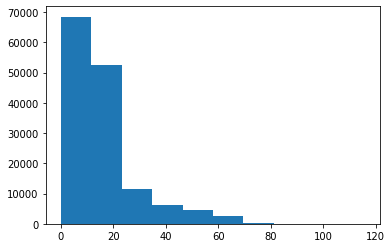

In [38]:
plt.hist(lengths)

* X_train 데이터의 평균 길이가 약 16, 중간값이 12라서, 길이를 10이하로 제한하기로 결정한다.

## 2-2. keras.preprocessing.sequence.pad_sequences 을 활용한 패딩 추가

In [64]:
X_train_maxlen = tf.keras.preprocessing.sequence.pad_sequences(X_train,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=10)
print(X_train_maxlen)

[[  32   74  919 ...   20   33  748]
 [ 120    4   70 ...   15   44  391]
 [  24  205    3 ...    0    0    0]
 ...
 [   3   18 1510 ... 2710    6   18]
 [1052    5 2516 ...   60  395 8572]
 [ 181    5 1945 ... 2740    5    0]]


In [65]:
X_test_maxlen = tf.keras.preprocessing.sequence.pad_sequences(X_test,
                                                       value=word_to_index['<PAD>'],
                                                       padding='post',
                                                       maxlen=10)
print(X_test_maxlen)

[[ 832  130    0 ...    0    0    0]
 [   3    0    0 ...    0    0    0]
 [ 950  332   44 ... 3557   73  917]
 ...
 [  46   38    4 ...    8   12 3424]
 [   7    4    4 ...   67  323   43]
 [1009  179   63 ...    0    0    0]]


In [89]:
X_test_maxlen2 = X_test_maxlen.copy()
X_train_maxlen2 = X_train_maxlen.copy()
X_test_maxlen3 = X_test_maxlen.copy()
X_train_maxlen3 = X_train_maxlen.copy()

In [81]:
print(get_decoded_sentence(X_train_maxlen2[23], index_to_word))
print('라벨: ', y_train[23])  # 1번째 리뷰데이터의 라벨

평범 영화 아닌 수작 라는 걸 말씀 드립니다 .
라벨:  1


# 3 모델 구성 및 validation set 구성

## 3-1. 모델1: RNN

In [112]:
vocab_size = len(word_to_index)                    # 146182
word_vector_dim = 5
embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)
output = embedding(X_train_maxlen)
print(output)

tf.Tensor(
[[[ 0.04279009  0.01240234  0.03155344 -0.00266653 -0.02368178]
  [ 0.04903412 -0.02892839  0.04066627  0.01413441  0.00037515]
  [-0.01964617  0.00279442  0.00513436 -0.02458843  0.04008082]
  ...
  [-0.03870058  0.02614558  0.0100317   0.03791943 -0.04732453]
  [-0.00519123 -0.02869982 -0.0082729  -0.04532267  0.03260145]
  [-0.00365335  0.03387127 -0.017542    0.0155993  -0.01096164]]

 [[ 0.04876952 -0.03578449 -0.00218296 -0.04424952 -0.03868853]
  [ 0.00529083 -0.04824431  0.02531028 -0.03076986 -0.01139148]
  [ 0.03587115 -0.04269201  0.005086    0.01221617  0.00522469]
  ...
  [-0.01052538 -0.02935906 -0.03410485  0.04115525  0.02276529]
  [-0.02001871 -0.01424915 -0.03986497 -0.01779839  0.02389144]
  [ 0.01153535  0.03938336  0.01042944  0.03478399  0.0113198 ]]

 [[ 0.02910357  0.01468777 -0.02366518 -0.02880385 -0.00924083]
  [-0.02538202  0.01965377  0.00399599  0.01691801 -0.01829256]
  [ 0.02926642  0.00514688  0.01428788  0.0443799   0.02367641]
  ...
  [ 0.0

In [70]:
output.shape

TensorShape([146182, 10, 5])

In [115]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.LSTM(8)) 
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 5)           50000     
                                                                 
 lstm_1 (LSTM)               (None, 8)                 448       
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 50,529
Trainable params: 50,529
Non-trainable params: 0
_________________________________________________________________


In [116]:
print(get_decoded_sentence(X_train_maxlen2[23], index_to_word))
print('라벨: ', y_train[23])  # 1번째 리뷰데이터의 라벨

평범 영화 아닌 수작 라는 걸 말씀 드립니다 .
라벨:  1


In [117]:
print(X_train_maxlen.shape)
y_train.shape

(146182, 10)


(146182,)

In [118]:
# validation set 50000건 분리
X_val = X_train_maxlen[:50000]   
y_val = y_train[:50000]

# validation set을 제외한 나머지
partial_X_train_manxlen = X_train_maxlen[50000:]  
partial_y_train = y_train[50000:]

print(partial_X_train_manxlen.shape)
print(partial_y_train.shape)

(96182, 10)
(96182,)


In [119]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20

history = model.fit(partial_X_train_manxlen,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/20
188/188 [==============================] - 4s 13ms/step - loss: 0.5774 - accuracy: 0.7150 - val_loss: 0.4477 - val_accuracy: 0.7972
Epoch 2/20
188/188 [==============================] - 2s 10ms/step - loss: 0.4092 - accuracy: 0.8180 - val_loss: 0.4052 - val_accuracy: 0.8174
Epoch 3/20
188/188 [==============================] - 2s 10ms/step - loss: 0.3757 - accuracy: 0.8368 - val_loss: 0.4002 - val_accuracy: 0.8182
Epoch 4/20
188/188 [==============================] - 2s 11ms/step - loss: 0.3610 - accuracy: 0.8446 - val_loss: 0.4003 - val_accuracy: 0.8182
Epoch 5/20
188/188 [==============================] - 2s 11ms/step - loss: 0.3524 - accuracy: 0.8484 - val_loss: 0.4041 - val_accuracy: 0.8178
Epoch 6/20
188/188 [==============================] - 2s 11ms/step - loss: 0.3455 - accuracy: 0.8515 - val_loss: 0.4076 - val_accuracy: 0.8171
Epoch 7/20
188/188 [==============================] - 2s 11ms/step - loss: 0.3406 - accuracy: 0.8531 - val_loss: 0.4076 - val_accuracy: 0.8169

In [93]:
results = model.evaluate(X_test_maxlen,  y_test, verbose=2)

print(results)

1537/1537 - 2s - loss: 0.5231 - accuracy: 0.8050 - 2s/epoch - 2ms/step
[0.5230775475502014, 0.8050328493118286]


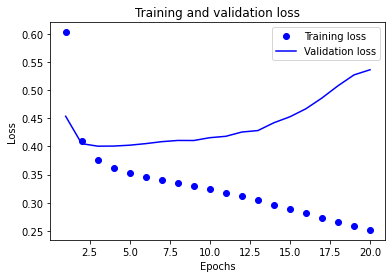

In [94]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

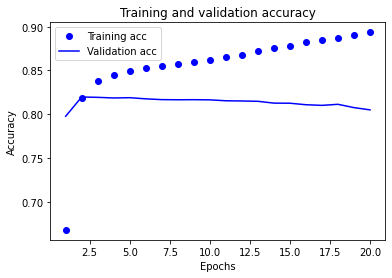

In [96]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## 3-2. 모델2: 1D CNN

In [128]:
vocab_size = len(word_to_index)                    # 146182
word_vector_dim = 5
embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)
output = embedding(X_train_maxlen2)
print(output)

tf.Tensor(
[[[-0.02843056 -0.02306886 -0.00905099  0.02021557  0.00703312]
  [ 0.0171644  -0.0265623   0.03133192  0.0051002  -0.03262692]
  [-0.04004651 -0.00351962  0.03693858 -0.03432641  0.01300821]
  ...
  [-0.00670679  0.00672629  0.00582657  0.0482039  -0.0396956 ]
  [ 0.0115096  -0.03275775 -0.00279178  0.01684531  0.03349341]
  [ 0.03725531 -0.04921522 -0.00980549  0.00950057 -0.02462708]]

 [[-0.01383461  0.02843369  0.03461068  0.02348281 -0.02147754]
  [ 0.0357285   0.00575719  0.03799548 -0.04815437 -0.00899801]
  [ 0.02577109 -0.02599503  0.00999359 -0.00186248 -0.02237164]
  ...
  [-0.00162077 -0.02613149 -0.03239982  0.03586782  0.01875223]
  [-0.03391405 -0.03167806 -0.0425062   0.04880956  0.03077537]
  [ 0.03288228 -0.03372717  0.00899984  0.02465374  0.02026245]]

 [[-0.03900076 -0.00638354 -0.04436178 -0.01105797 -0.03781945]
  [-0.03521593  0.04422033  0.03063402  0.01520393  0.00330386]
  [-0.0442921   0.04175711 -0.03376774  0.01246141 -0.00056456]
  ...
  [ 0.0

In [127]:
output.shape

TensorShape([146182, 10, 5])

In [149]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(8, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(2))
model.add(tf.keras.layers.Conv1D(8, 3, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, None, 5)           50000     
                                                                 
 conv1d_12 (Conv1D)          (None, None, 8)           128       
                                                                 
 max_pooling1d_6 (MaxPooling  (None, None, 8)          0         
 1D)                                                             
                                                                 
 conv1d_13 (Conv1D)          (None, None, 8)           200       
                                                                 
 global_max_pooling1d_6 (Glo  (None, 8)                0         
 balMaxPooling1D)                                                
                                                                 
 dense_16 (Dense)            (None, 4)                

In [141]:
print(X_train_maxlen2.shape)
y_train.shape

(146182, 10)


(146182,)

In [145]:
# validation set 50000건 분리
X_val2 = X_train_maxlen2[:50000]   
y_val2 = y_train[:50000]

# validation set을 제외한 나머지
partial_X_train_manxlen2 = X_train_maxlen2[50000:]  
partial_y_train2 = y_train[50000:]

print(partial_X_train_manxlen2.shape)
print(partial_y_train.shape)

(96182, 10)
(96182,)


In [150]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20

history = model.fit(partial_X_train_manxlen2,
                    partial_y_train2,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val2, y_val2),
                    verbose=1)

Epoch 1/20
188/188 [==============================] - 2s 7ms/step - loss: 0.6544 - accuracy: 0.6233 - val_loss: 0.5630 - val_accuracy: 0.7680
Epoch 2/20
188/188 [==============================] - 1s 6ms/step - loss: 0.5164 - accuracy: 0.7986 - val_loss: 0.4983 - val_accuracy: 0.8001
Epoch 3/20
188/188 [==============================] - 1s 6ms/step - loss: 0.4608 - accuracy: 0.8287 - val_loss: 0.4741 - val_accuracy: 0.8082
Epoch 4/20
188/188 [==============================] - 1s 6ms/step - loss: 0.4261 - accuracy: 0.8441 - val_loss: 0.4681 - val_accuracy: 0.8077
Epoch 5/20
188/188 [==============================] - 1s 6ms/step - loss: 0.4012 - accuracy: 0.8534 - val_loss: 0.4561 - val_accuracy: 0.8110
Epoch 6/20
188/188 [==============================] - 1s 6ms/step - loss: 0.3813 - accuracy: 0.8606 - val_loss: 0.4540 - val_accuracy: 0.8106
Epoch 7/20
188/188 [==============================] - 1s 6ms/step - loss: 0.3643 - accuracy: 0.8670 - val_loss: 0.4550 - val_accuracy: 0.8093
Epoch 

In [151]:
results = model.evaluate(X_test_maxlen,  y_test, verbose=2)
print(results)

1537/1537 - 1s - loss: 0.5800 - accuracy: 0.7967 - 1s/epoch - 874us/step
[0.5799591541290283, 0.7966922521591187]


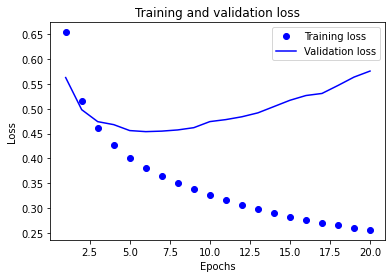

In [152]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
# "bo"는 "파란색 점"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

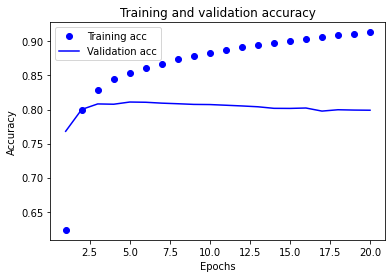

In [153]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## 3-3. 모델3: GlobalMaxPooling1D

In [154]:
vocab_size = len(word_to_index)                    # 146182
word_vector_dim = 5
embedding = tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=word_vector_dim, mask_zero=True)
output = embedding(X_train_maxlen2)
print(output)

tf.Tensor(
[[[ 0.02351452  0.01181041 -0.0223457  -0.03262763  0.02467524]
  [ 0.02274228  0.03396581  0.03043461  0.02369888 -0.04639563]
  [ 0.02553386  0.0475243  -0.00575069  0.01772735 -0.01268941]
  ...
  [ 0.03090439  0.0265109  -0.01466193 -0.03283966  0.01560792]
  [-0.04977464  0.01053714 -0.01886611 -0.02131858  0.00173368]
  [ 0.00449036  0.01889614 -0.04655236  0.02074386 -0.02025087]]

 [[-0.0014631   0.00789821  0.02202619 -0.03124745  0.03601005]
  [ 0.02576286 -0.00356697  0.02950486 -0.03276767 -0.00119019]
  [-0.02541669 -0.01623105  0.00482553  0.04667506  0.01265969]
  ...
  [-0.04190223 -0.0494486   0.0198017  -0.00044524  0.04443849]
  [ 0.00740026  0.03126912 -0.00874796  0.01894811 -0.01701957]
  [-0.03228035  0.02263052  0.00750409 -0.03494736 -0.0432862 ]]

 [[-0.00154823  0.04589542 -0.00139439 -0.00759603 -0.02058682]
  [ 0.02091957  0.04392303  0.00240088  0.03931731  0.04394276]
  [-0.0377299  -0.03902338 -0.01707947  0.00743265  0.02645748]
  ...
  [-0.0

In [155]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_16 (Embedding)    (None, None, 5)           50000     
                                                                 
 global_max_pooling1d_7 (Glo  (None, 5)                0         
 balMaxPooling1D)                                                
                                                                 
 dense_18 (Dense)            (None, 8)                 48        
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 50,057
Trainable params: 50,057
Non-trainable params: 0
_________________________________________________________________


In [156]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20

history = model.fit(partial_X_train_manxlen,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/20
188/188 [==============================] - 1s 4ms/step - loss: 0.6648 - accuracy: 0.7012 - val_loss: 0.5964 - val_accuracy: 0.7550
Epoch 2/20
188/188 [==============================] - 1s 3ms/step - loss: 0.5144 - accuracy: 0.7803 - val_loss: 0.4611 - val_accuracy: 0.7903
Epoch 3/20
188/188 [==============================] - 1s 3ms/step - loss: 0.4203 - accuracy: 0.8160 - val_loss: 0.4235 - val_accuracy: 0.8068
Epoch 4/20
188/188 [==============================] - 1s 3ms/step - loss: 0.3844 - accuracy: 0.8329 - val_loss: 0.4130 - val_accuracy: 0.8124
Epoch 5/20
188/188 [==============================] - 1s 3ms/step - loss: 0.3632 - accuracy: 0.8432 - val_loss: 0.4104 - val_accuracy: 0.8137
Epoch 6/20
188/188 [==============================] - 1s 3ms/step - loss: 0.3477 - accuracy: 0.8505 - val_loss: 0.4115 - val_accuracy: 0.8150
Epoch 7/20
188/188 [==============================] - 1s 3ms/step - loss: 0.3356 - accuracy: 0.8568 - val_loss: 0.4146 - val_accuracy: 0.8150
Epoch 

In [157]:
results = model.evaluate(X_test_maxlen,  y_test, verbose=2)
print(results)

1537/1537 - 1s - loss: 0.4828 - accuracy: 0.8046 - 1s/epoch - 746us/step
[0.4828299582004547, 0.804585337638855]


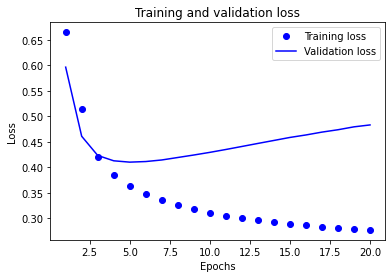

In [158]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
# "bo"는 "파란색 점"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

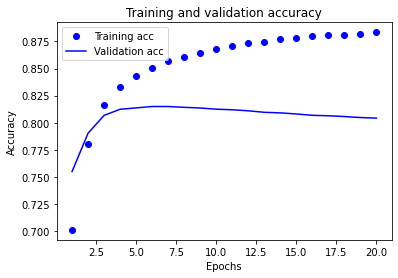

In [159]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#4 gensim을 이용한 임베딩 레이어 비교

In [199]:

embedding_layer = model.layers[0]
weights = embedding_layer.get_weights()[0]
print(weights.shape)    # shape: (vocab_size, embedding_dim교

(10000, 5)


In [200]:
# 학습한 Embedding 파라미터를 파일에 써서 저장
word2vec_file_path = '/content/data/word2vec.txt'
f = open(word2vec_file_path, 'w', encoding='utf8')
f.write('{} {}\n'.format(vocab_size-4, word_vector_dim))

7

In [201]:
# 단어 개수(에서 특수문자 4개는 제외하고)만큼의 워드 벡터를 파일에 기록
vectors = model.get_weights()[0]
for i in range(4,vocab_size):
    f.write('{} {}\n'.format(index_to_word[i], ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [202]:
from gensim.models.keyedvectors import Word2VecKeyedVectors

word_vectors = Word2VecKeyedVectors.load_word2vec_format(word2vec_file_path, binary=False)
vector = word_vectors['컴퓨터']
vector

array([ 0.15653437, -0.21908972, -0.08284663, -0.20972656,  0.01725782],
      dtype=float32)

In [203]:
# gensim 평가: 유사도 확인
word_vectors.similar_by_word("재미")

[('의미', 0.9941054582595825),
 ('발랄', 0.9925529360771179),
 ('찌꺼기', 0.9898647665977478),
 ('돌아왔', 0.9894179105758667),
 ('이게', 0.9893652200698853),
 ('풀', 0.9864339828491211),
 ('밀려온다', 0.9863560795783997),
 ('.....', 0.984539270401001),
 ('왕조현', 0.9822125434875488),
 ('노아', 0.9819349646568298)]

In [210]:
from gensim.models import KeyedVectors

word2vec_path = '/content/data/kor.bin'
# word2vec = KeyedVectors.load_word2vec_format(word2vec_path, binary=True, limit=1000000)
w2v_model = gensim.models.Word2Vec.load(word2vec_path)
kv_model  = w2v_model.wv
# vector = word2vec['컴퓨터']
vector = kv_model['컴퓨터']
vector

array([-1.517628  , -0.8935504 , -1.4352998 ,  1.5069847 , -1.5178334 ,
        1.1542678 , -2.94064   ,  1.1850045 ,  0.19959009, -1.5288961 ,
       -1.7067502 , -2.1892095 , -0.20728938, -2.2606812 , -2.2283888 ,
        0.32318738, -0.2845471 , -0.07731772, -0.86269003, -1.1722927 ,
       -0.91062415,  0.8440715 ,  0.903278  , -0.84685427,  0.7023384 ,
       -2.1920419 , -0.47571626, -0.60159504, -0.68860835,  0.18944737,
        0.5319404 ,  0.73058116, -0.9658133 , -1.0123725 , -0.36183038,
        2.5851305 ,  0.66589296, -1.7231252 ,  1.7576753 ,  0.88845277,
        1.5791365 , -4.430691  ,  0.36731872,  0.69481534, -0.46041563,
        1.742655  , -1.5077016 ,  0.72209424, -0.04532204, -0.6557301 ,
       -0.71276623,  0.26522732, -0.17656395, -2.4720876 , -0.845565  ,
        0.23591152,  1.3414925 ,  0.77577615, -2.289371  , -0.8078124 ,
        1.4359473 ,  0.22882733, -1.08867   ,  1.2607764 , -1.7469797 ,
        0.06542054,  0.39896825, -0.3160832 , -1.7257563 ,  0.54

In [226]:
# 유사도
# word2vec.similar_by_word("재미")
kv_model.similar_by_word("재미")

[('취미', 0.5857348442077637),
 ('유머', 0.5140613913536072),
 ('매력', 0.5105490684509277),
 ('흥미', 0.4988338351249695),
 ('공짜', 0.4960595667362213),
 ('일자리', 0.49294644594192505),
 ('즐거움', 0.48700767755508423),
 ('비애', 0.4836210310459137),
 ('관객', 0.48286449909210205),
 ('향수', 0.4823310971260071)]

* 사전학습된 임베딩레이어에서의 유사도가 보다 좋아 보인다.

* 자체학습 임베딩레이어에서 '재미'의 유사도 <br>
[('의미', 0.9941054582595825),
 ('발랄', 0.9925529360771179),
 ('찌꺼기', 0.9898647665977478),
 ('돌아왔', 0.9894179105758667),
 ('이게', 0.9893652200698853),
 ('풀', 0.9864339828491211),
 ('밀려온다', 0.9863560795783997),
 ('.....', 0.984539270401001),
 ('왕조현', 0.9822125434875488),
 ('노아', 0.9819349646568298)]

* 사전학습된 임베딩레이어에서 '재미'의 유사도 <br>
 [('취미', 0.5857348442077637),
 ('유머', 0.5140613913536072),
 ('매력', 0.5105490684509277),
 ('흥미', 0.4988338351249695),
 ('공짜', 0.4960595667362213),
 ('일자리', 0.49294644594192505),
 ('즐거움', 0.48700767755508423),
 ('비애', 0.4836210310459137),
 ('관객', 0.48286449909210205),
 ('향수', 0.4823310971260071)]



#5 한국어 Word2vec 적용

In [231]:
vocab_size = 10000
word_vector_dim = 200
embedding_matrix = np.random.rand(vocab_size, word_vector_dim)

# embedding_matrix에 Word2Vec 워드 벡터를 단어 하나씩마다 차례차례 카피한다.
for i in range(4,vocab_size):
    if index_to_word[i] in kv_model:
        embedding_matrix[i] = kv_model[index_to_word[i]]

In [233]:
from tensorflow.keras.initializers import Constant

vocab_size = 10000 
word_vector_dim = 200

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model.add(tf.keras.layers.Conv1D(8, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(2))
model.add(tf.keras.layers.Conv1D(8, 3, activation='relu'))
model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) 

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_17 (Embedding)    (None, None, 200)         2000000   
                                                                 
 conv1d_14 (Conv1D)          (None, None, 8)           4808      
                                                                 
 max_pooling1d_7 (MaxPooling  (None, None, 8)          0         
 1D)                                                             
                                                                 
 conv1d_15 (Conv1D)          (None, None, 8)           200       
                                                                 
 global_max_pooling1d_8 (Glo  (None, 8)                0         
 balMaxPooling1D)                                                
                                                                 
 dense_20 (Dense)            (None, 4)               

In [235]:
model.compile(optimizer='adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20

history = model.fit(partial_X_train_manxlen,
                    partial_y_train,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/20
188/188 [==============================] - 8s 42ms/step - loss: 0.5472 - accuracy: 0.7190 - val_loss: 0.4268 - val_accuracy: 0.8084
Epoch 2/20
188/188 [==============================] - 8s 42ms/step - loss: 0.3853 - accuracy: 0.8320 - val_loss: 0.3975 - val_accuracy: 0.8200
Epoch 3/20
188/188 [==============================] - 8s 43ms/step - loss: 0.3366 - accuracy: 0.8579 - val_loss: 0.3971 - val_accuracy: 0.8222
Epoch 4/20
188/188 [==============================] - 8s 43ms/step - loss: 0.2951 - accuracy: 0.8790 - val_loss: 0.4112 - val_accuracy: 0.8206
Epoch 5/20
188/188 [==============================] - 8s 43ms/step - loss: 0.2534 - accuracy: 0.8989 - val_loss: 0.4373 - val_accuracy: 0.8156
Epoch 6/20
188/188 [==============================] - 8s 43ms/step - loss: 0.2154 - accuracy: 0.9150 - val_loss: 0.4736 - val_accuracy: 0.8135
Epoch 7/20
188/188 [==============================] - 8s 43ms/step - loss: 0.1837 - accuracy: 0.9270 - val_loss: 0.5198 - val_accuracy: 0.8100

In [236]:
results = model.evaluate(X_test_maxlen,  y_test, verbose=2)
print(results)

1537/1537 - 2s - loss: 1.2742 - accuracy: 0.7840 - 2s/epoch - 1ms/step
[1.2741719484329224, 0.7839778661727905]


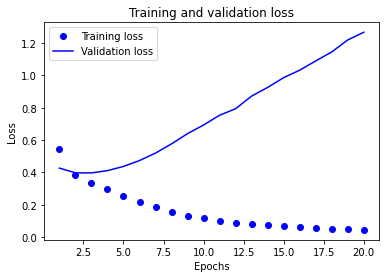

In [237]:
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc) + 1)
# "bo"는 "파란색 점"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

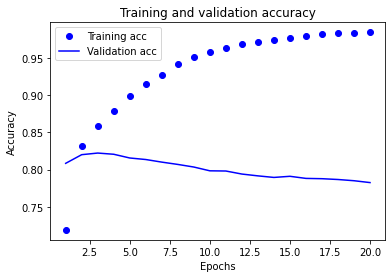

In [238]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#6 회고

* 모델 RNN, 1D CNN, GlobalMaxPooling1D의 경우, accuracy기준으로 GlobalMaxPooling1D가 조금 낮았지만, 예상보다 좋은 결과가 나와서 놀랐다.
* 당연한 것이지만, 하이퍼파라미터에 따라 모델의 성능이 좌우되므로, 충분한 추가 시험을 못한것이 아쉬웠었다.
* gensim을 활용하여, 사전학습된 임베딩레이어랑 비교시, 사전학습된 것이 더 좋은 결과를 보였다. 확실히, word에 대한 vector표현이 풍부한 걸 느낄 수 있었다.
* word2vec을 적용한 결과, 꼭 성능이 좋지 않았는데, 이는 word2vec를 적용하는 과정에서 vocab size와 word vecor dim.을 통일하는 과정에서, 적절치 않은 하이퍼파라미터가 적용되었기 때문인 듯하다.